# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car resocgnizing the car in front.

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak), using the image_data_modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or what doesn't work) before scaling up.

## Get the data

In [1]:
import zipfile

# Download the data to Google Colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-04-02 15:05:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  52.4MB/s    in 2.0s    

2025-04-02 15:05:23 (52.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inpect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project, this usually means visualizing many samples of the data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filename in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filename)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) # read an image file and store it as a NumPy array
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['823104.jpg']
Image shape: (306, 512, 3)


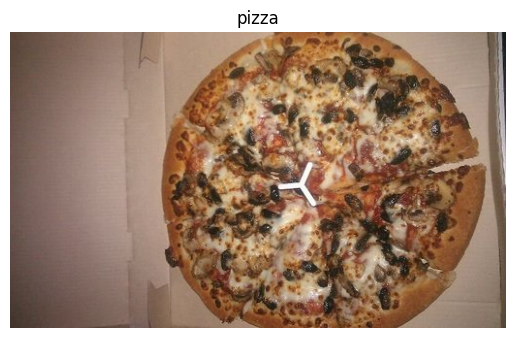

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[90, 72, 60],
        [89, 71, 59],
        [88, 70, 58],
        ...,
        [20, 26, 24],
        [20, 29, 26],
        [17, 26, 23]],

       [[89, 71, 59],
        [89, 71, 59],
        [88, 70, 58],
        ...,
        [23, 29, 27],
        [22, 31, 28],
        [18, 27, 24]],

       [[89, 69, 58],
        [89, 69, 58],
        [89, 69, 58],
        ...,
        [22, 28, 26],
        [21, 30, 27],
        [16, 25, 22]],

       ...,

       [[70, 53, 46],
        [67, 52, 45],
        [66, 51, 44],
        ...,
        [82, 66, 50],
        [83, 70, 53],
        [82, 69, 52]],

       [[68, 49, 43],
        [67, 50, 43],
        [65, 50, 43],
        ...,
        [79, 66, 50],
        [81, 69, 53],
        [82, 70, 54]],

       [[68, 49, 43],
        [67, 50, 43],
        [67, 50, 43],
        ...,
        [79, 66, 50],
        [81, 69, 55],
        [80, 71, 56]]], dtype=uint8)>

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called scaling or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
# Data and labels are also automatically generated for us
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, #Yann Lecun batch size
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - accuracy: 0.5163 - loss: 0.8103 - val_accuracy: 0.7900 - val_loss: 0.4945
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.7892 - loss: 0.4875 - val_accuracy: 0.8400 - val_loss: 0.3845
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.8116 - loss: 0.4210 - val_accuracy: 0.8680 - val_loss: 0.3470
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.8397 - loss: 0.3634 - val_accuracy: 0.8600 - val_loss: 0.3646
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.8650 - loss: 0.3395 - val_accuracy: 0.8660 - val_loss: 0.3298


In [12]:
len(train_data), 1500/32

(47, 46.875)

In [13]:
#This is only with CPU

#Epoch 1/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.6730 - loss: 0.6166 - val_accuracy: 0.6480 - val_loss: 0.6625
#Epoch 2/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7580 - loss: 0.5245 - val_accuracy: 0.8520 - val_loss: 0.3679
#Epoch 3/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7845 - loss: 0.4356 - val_accuracy: 0.8620 - val_loss: 0.3658
#Epoch 4/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8272 - loss: 0.3926 - val_accuracy: 0.8520 - val_loss: 0.3578
#Epoch 5/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8817 - loss: 0.3084 - val_accuracy: 0.8520 - val_loss: 0.3700

#This is with GPU

#Epoch 1/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - accuracy: 0.5163 - loss: 0.8103 - val_accuracy: 0.7900 - val_loss: 0.4945
#Epoch 2/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.7892 - loss: 0.4875 - val_accuracy: 0.8400 - val_loss: 0.3845
#Epoch 3/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.8116 - loss: 0.4210 - val_accuracy: 0.8680 - val_loss: 0.3470
#Epoch 4/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.8397 - loss: 0.3634 - val_accuracy: 0.8600 - val_loss: 0.3646
#Epoch 5/5
#47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.8650 - loss: 0.3395 - val_accuracy: 0.8660 - val_loss: 0.3298

> **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure we're using GPU.

In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

**Resource to read and play around:** https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we built in the previous section to see if it works with our image data.

The model we're building is from TensorFlow playground: https://playground.tensorflow.org

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras. Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.4969 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.5093 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5115 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


Model 2 doesn't really works with our image data. The accuracy is simply guessing.

In [18]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Model 2 has a very higher number of trainable parameters than the CNN (model 1), but it stills perform worser. Let's try to upgrade model 2 to perform better.

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - accuracy: 0.5439 - loss: 6.7359 - val_accuracy: 0.7820 - val_loss: 0.6500
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.6932 - loss: 0.8513 - val_accuracy: 0.6680 - val_loss: 0.7615
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.6805 - loss: 0.8866 - val_accuracy: 0.7820 - val_loss: 0.4724
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7917 - loss: 0.5009 - val_accuracy: 0.7880 - val_loss: 0.4631
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.7966 - loss: 0.4531 - val_accuracy: 0.6620 - val_loss: 0.8759


In [21]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

Model 3 performs better than model 2, but still not as good as our CNN model (model 1) even with a very very very higher number of trainable parameters.

We can now understand how powerful CNN for computer vision.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, the main step here was scaling or normalizing).
3. Created a model (start with a baseline).
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to beat our baseline).
7. Repeat until satisfied (experiment, experiment, experiment).

### 1. Become one with the data

['1966967.jpg']
Image shape: (512, 512, 3)
['1678284.jpg']
Image shape: (512, 384, 3)


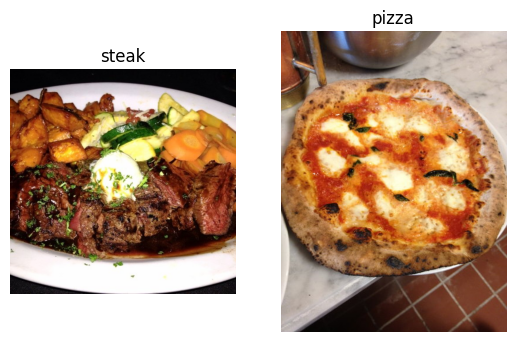

In [25]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)sz5